# Kolonlar (Değişkenler)

**id: Her bir satır (gözlem) için benzersiz bir kimlik numarasıdır. Modele dahil edilmez.**


**MonsoonIntensity: Muson (veya genel) yağmurlarının şiddeti.**


**TopographyDrainage: Arazinin topoğrafik yapısı ve doğal su drenaj (tahliye) kapasitesi.**


**RiverManagement: Nehir yönetimi, taşkın kontrol politikaları ve uygulamalarının seviyesi.**


**Deforestation: Ormansızlaşma (ağaç kesimi) miktarı. Toprağın su emme kapasitesini doğrudan etkiler.**


**Urbanization: Kentleşme oranı. Betonlaşma suyun emilimini azaltır.**


**ClimateChange: İklim değişikliğinin bölge üzerindeki etkilerinin derecesi.**


**DamsQuality: Bölgedeki barajların genel kalitesi ve durumu.**


**Siltation: Nehir yataklarında ve barajlarda biriken mil/tortu miktarı (su taşıma kapasitesini düşürür).**


**AgriculturalPractices: Tarımsal uygulamalar (örneğin sulama veya toprağı işleme biçimlerinin seli nasıl etkilediği).**


**Encroachments: Su yataklarına, taşkın sahalarına yapılan izinsiz yapılaşmalar veya tecavüzler.**


**IneffectiveDisasterPreparedness: Afet hazırlığının yetersizlik derecesi.**


**DrainageSystems: Şehir veya bölge drenaj (kanalizasyon ve yağmur suyu tahliye) sistemlerinin yeterliliği.**


**CoastalVulnerability: Kıyı şeridindeki savunmasızlık durumu (deniz seviyesi yükselmesi vb. etkenler).**


**Landslides: Heyelan riski veya geçmiş heyelan olaylarının yoğunluğu. Heyelanlar nehirlerin önünü kesebilir.**


**Watersheds: Su havzalarının (suların toplandığı doğal alanlar) durumu.**


**DeterioratingInfrastructure: Kötüleşen veya eskiyen altyapının seviyesi.**


**PopulationScore: Bölgenin nüfus yoğunluğu veya demografik skoru.**


**WetlandLoss: Suyu doğal bir sünger gibi emen sulak alanların kaybı.**


**InadequatePlanning: Yetersiz şehir ve bölge planlaması.**


**PoliticalFactors: Sel önleme bütçelerini veya politikalarını etkileyebilecek siyasi faktörler.**


**FloodProbability: (Hedef Değişken) Yukarıdaki faktörlere bağlı olarak gerçekleşmesi beklenen sel olasılığı.**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/playground-series-s4e5/sample_submission.csv
/kaggle/input/playground-series-s4e5/train.csv
/kaggle/input/playground-series-s4e5/test.csv


# Data Understanding

In [2]:
df = pd.read_csv("/kaggle/input/playground-series-s4e5/train.csv")

In [3]:
df_test = pd.read_csv("/kaggle/input/playground-series-s4e5/test.csv")

In [4]:
df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [6]:
df.shape

(1117957, 22)

In [7]:
df.isnull().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [8]:
df.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [9]:
# Test verisindeki ID'leri Kaggle teslimatı için saklıyoruz
test_ids = df_test['id'] 

# Hem eğitim hem de test verisinden id kolonunu siliyoruz
df = df.drop('id', axis=1)
df_test = df_test.drop('id', axis=1)

# EDA - Exploratory Data Analysis

In [10]:
#sns.pairplot(df)
#plt.show()

**Değişkenlerin Dağılımını Görmek (Histogramlar)**

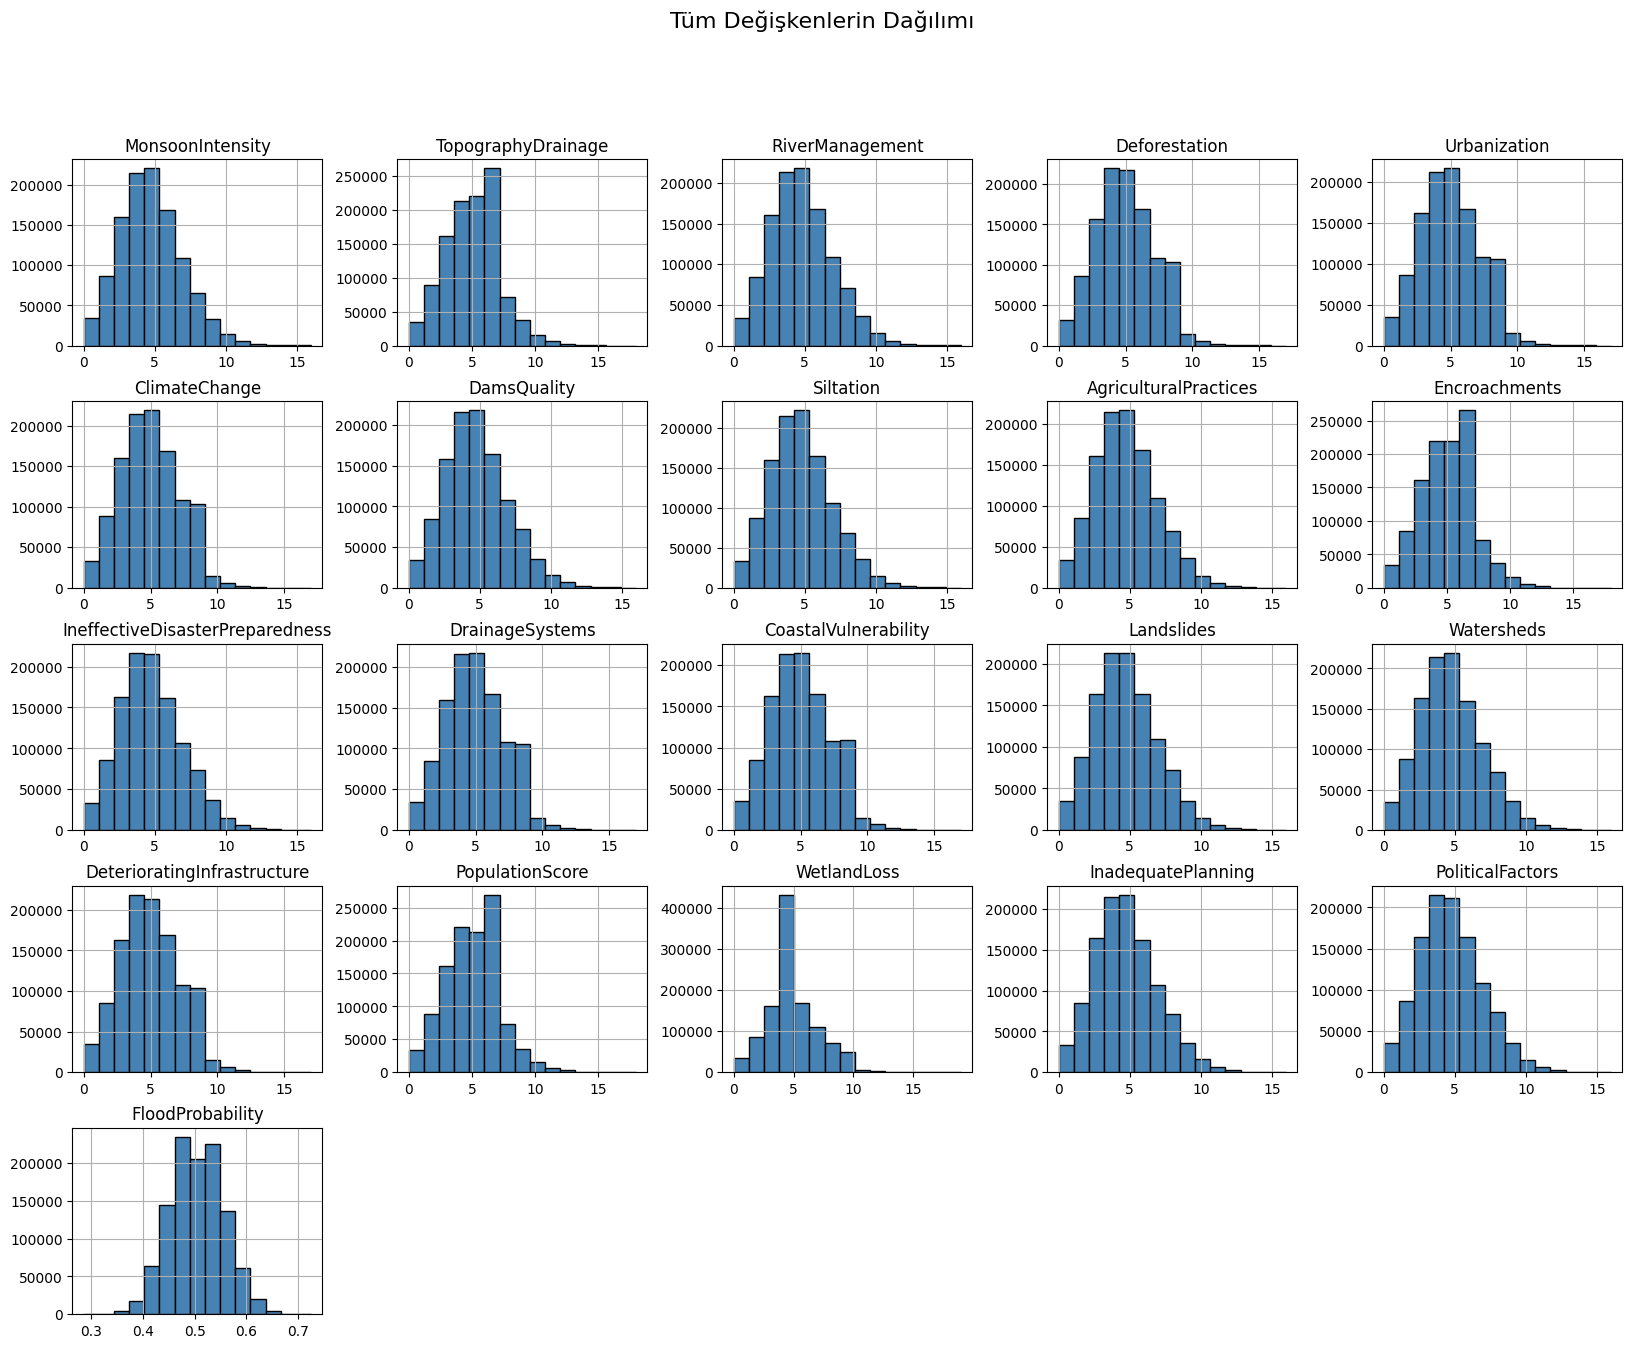

In [11]:
df.hist(bins=15, figsize=(20, 15), color='steelblue', edgecolor='black')
plt.suptitle('Tüm Değişkenlerin Dağılımı', fontsize=16)
plt.show()

**Korelasyon Matrisi (Heatmap) Oluşturmak**

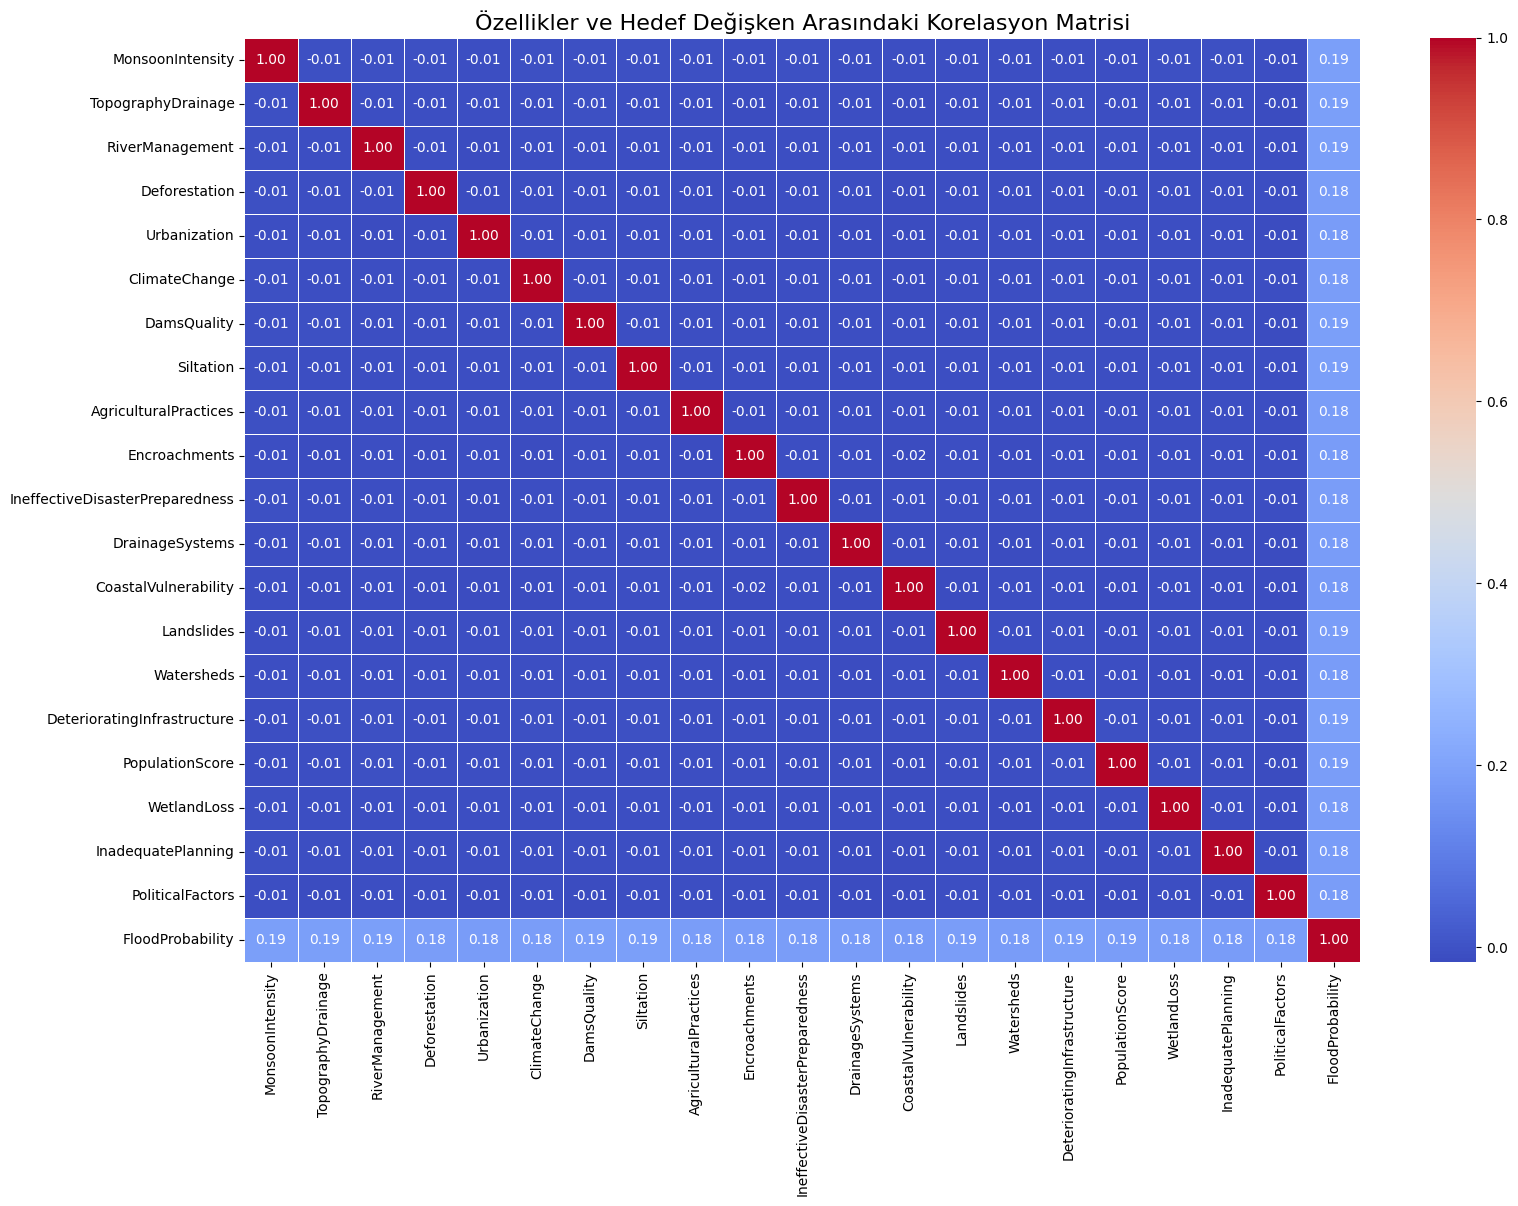

In [12]:

corr_matrix = df.corr()


plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Özellikler ve Hedef Değişken Arasındaki Korelasyon Matrisi', fontsize=16)
plt.show()

**Hedef Değişkenin (FloodProbability) Dağılımını İncelemek**

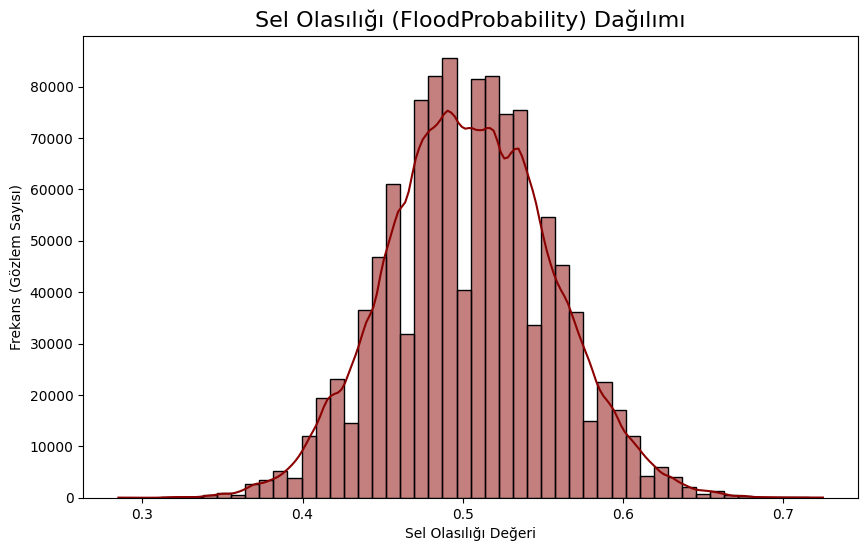

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['FloodProbability'], bins=50, kde=True, color='darkred')
plt.title('Sel Olasılığı (FloodProbability) Dağılımı', fontsize=16)
plt.xlabel('Sel Olasılığı Değeri')
plt.ylabel('Frekans (Gözlem Sayısı)')
plt.show()

**Bağımsız Değişkenlerin (Özelliklerin) Dağılımı**

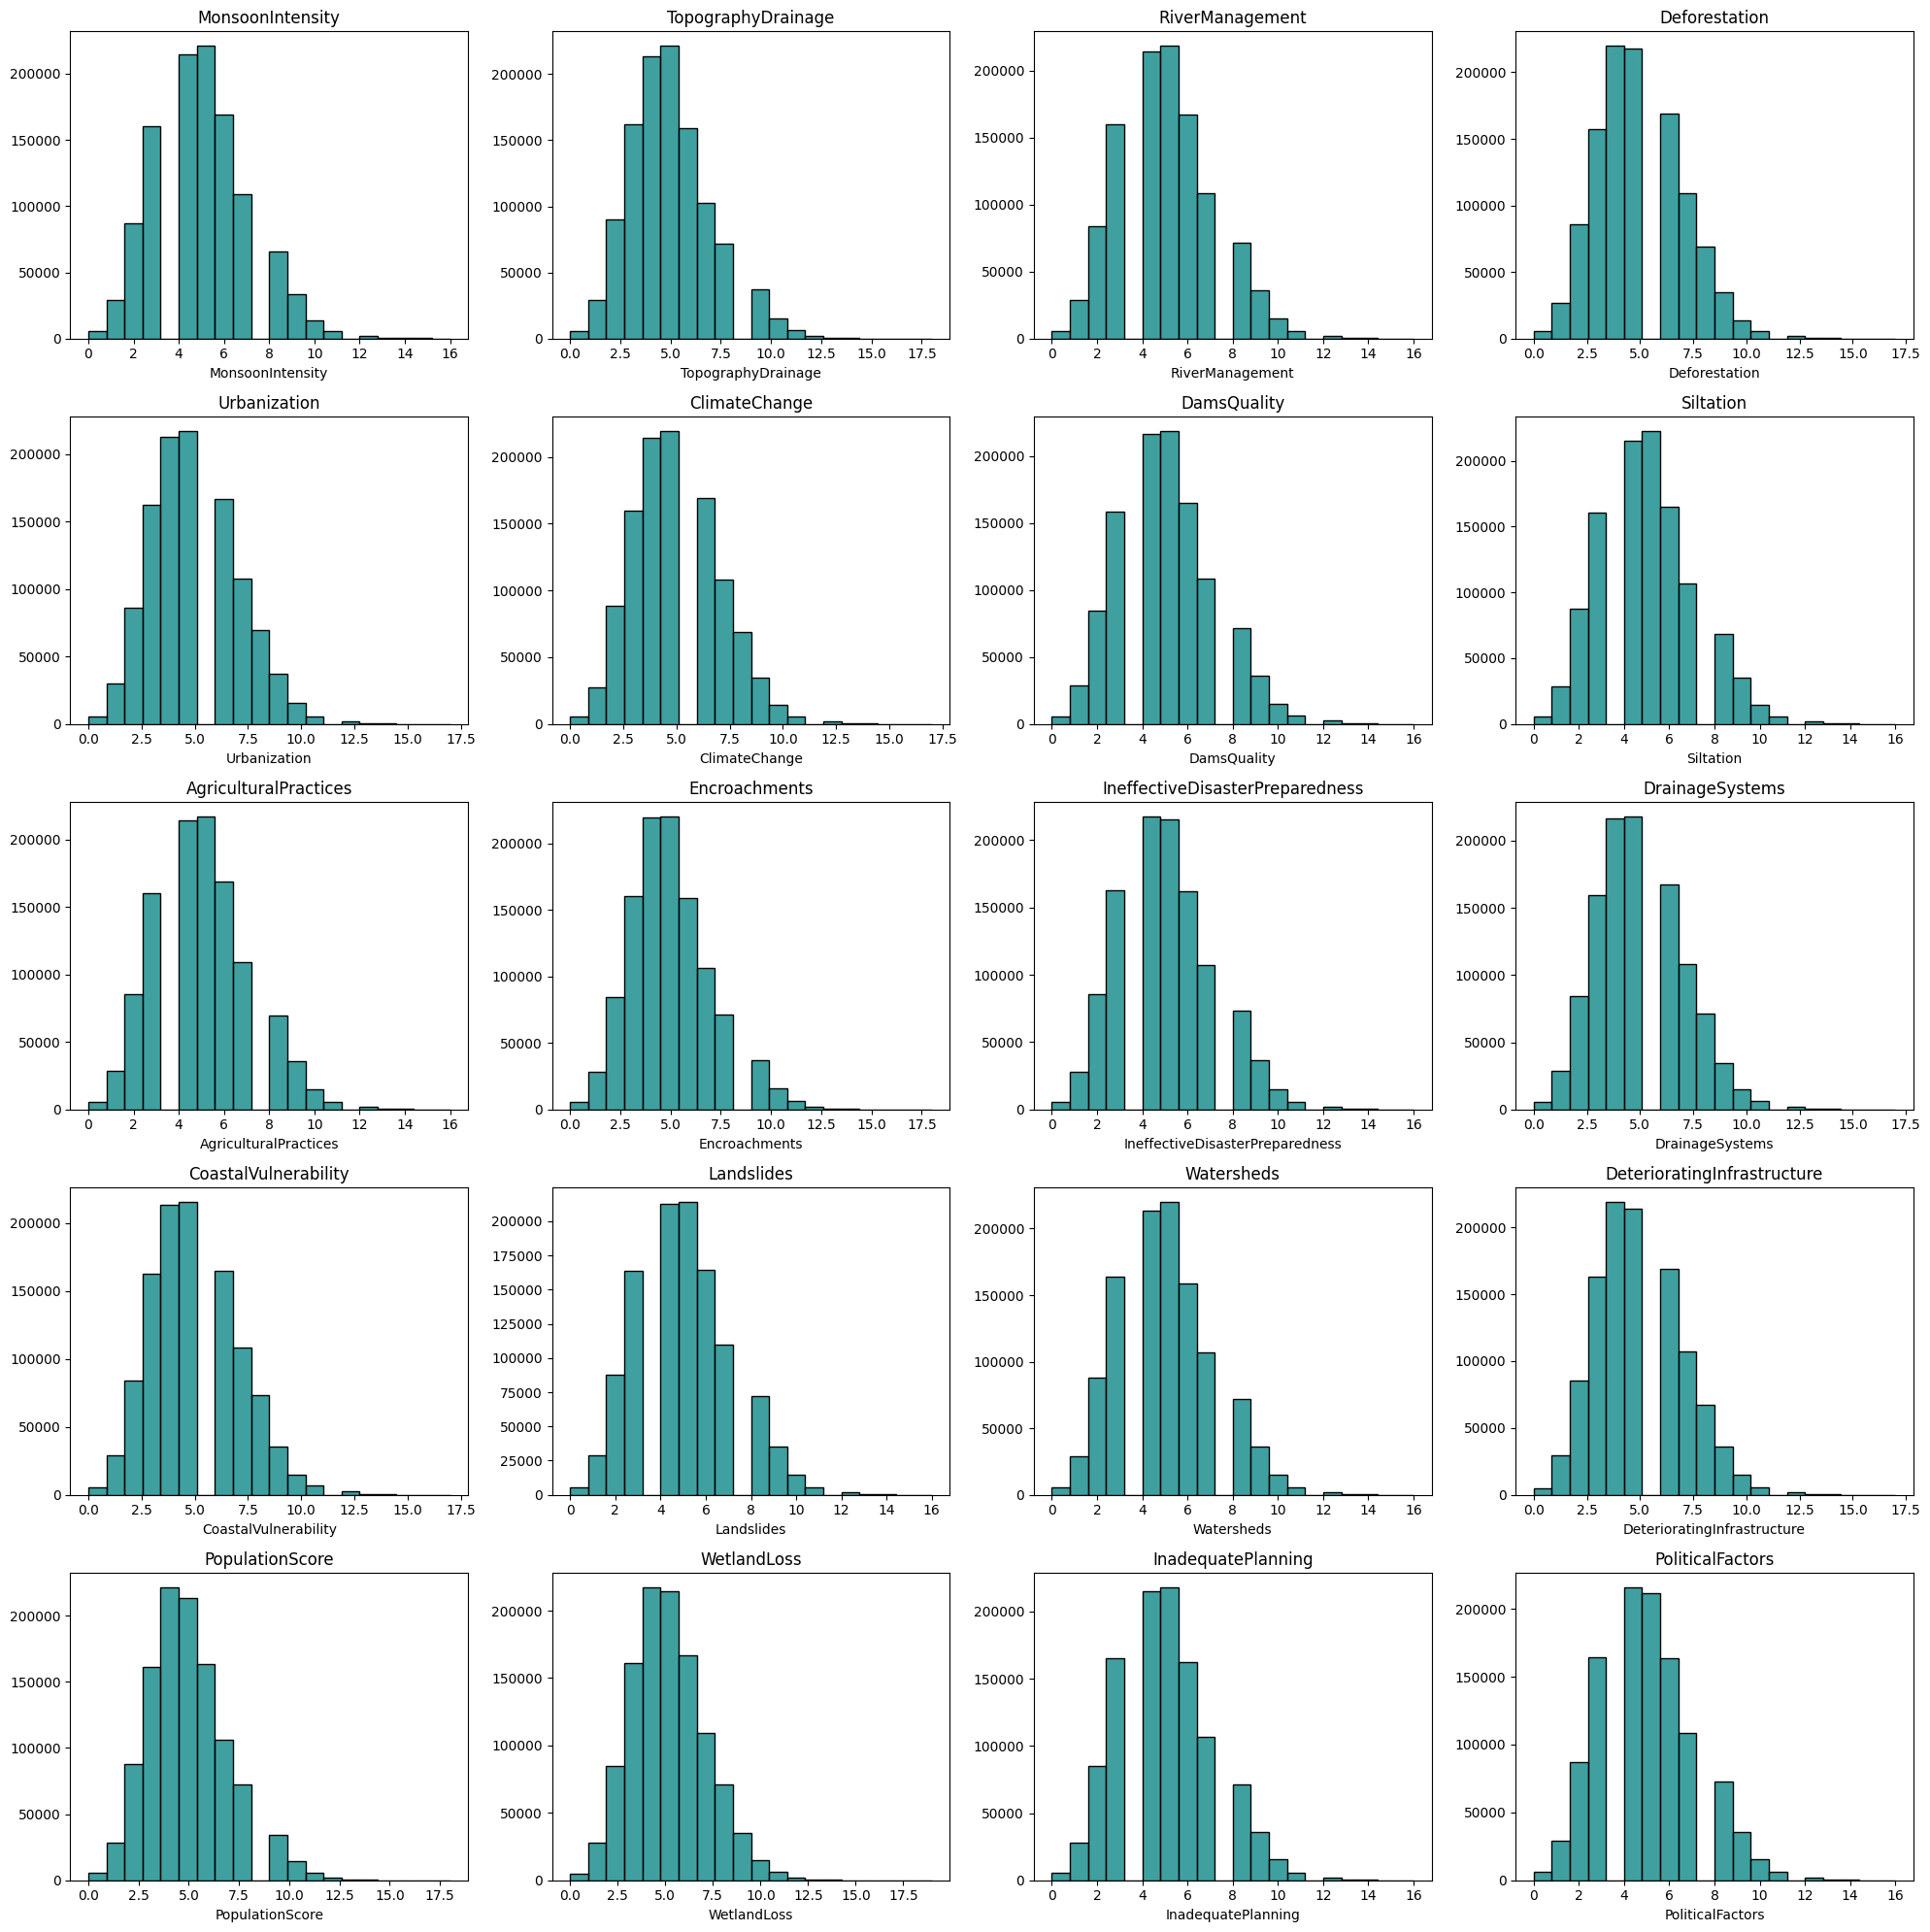

In [14]:
# Sadece özellik kolonlarını seçiyoruz (hedef değişkeni dışarıda bırakıyoruz)
features = [col for col in df.columns if col != 'FloodProbability']

# 5 satır ve 4 sütunluk bir grafik ızgarası oluşturuyoruz
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.histplot(df[col], bins=20, kde=False, ax=axes[i], color='teal')
    axes[i].set_title(col)
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

# Feature Engineering

In [15]:

features = [col for col in df.columns if col not in ['id', 'FloodProbability', 'Risk_Level', 'Total_Risk_Score']]


def create_new_features(data):
    
    data['Features_Sum'] = data[features].sum(axis=1)
    
    
    data['Features_Mean'] = data[features].mean(axis=1)
    
    
    data['Features_Std'] = data[features].std(axis=1)
    
   
    data['Features_Max'] = data[features].max(axis=1)
    data['Features_Min'] = data[features].min(axis=1)
    
    
    data['Features_Median'] = data[features].median(axis=1)
    
    return data


df = create_new_features(df)
df_test = create_new_features(df_test)


print("Eğitim seti yeni boyut:", df.shape)
print("Test seti yeni boyut:", df_test.shape)
df.head()

Eğitim seti yeni boyut: (1117957, 27)
Test seti yeni boyut: (745305, 26)


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability,Features_Sum,Features_Mean,Features_Std,Features_Max,Features_Min,Features_Median
0,5,8,5,8,6,4,4,3,3,4,...,5,7,3,0.445,94,4.70,1.750188,8,2,4.5
1,6,7,4,4,8,8,3,5,4,6,...,3,4,3,0.450,94,4.70,2.296450,9,0,4.0
2,6,5,6,7,3,7,1,5,4,5,...,2,3,3,0.530,99,4.95,1.932411,8,1,5.0
3,3,4,6,5,4,8,4,7,6,8,...,5,7,5,0.535,104,5.20,1.641565,8,2,5.0
4,5,3,2,6,4,4,3,3,3,3,...,2,3,5,0.415,72,3.60,1.500877,6,1,3.0


# Modeling

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

In [17]:
X = df.drop('FloodProbability', axis=1)  
y = df['FloodProbability']              

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=17)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_val_scaled = scaler.transform(X_val)         

print("Eğitim seti boyutu:", X_train_scaled.shape)
print("Doğrulama seti boyutu:", X_val_scaled.shape)

Eğitim seti boyutu: (894365, 26)
Doğrulama seti boyutu: (223592, 26)


In [20]:
model = Ridge(alpha=1.0) # alpha parametresi karmaşıklığı dengeler


model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_val_scaled)


score = r2_score(y_val, y_pred)
print(f"Ridge Regresyon R2 Skoru: {score:.5f}")

Ridge Regresyon R2 Skoru: 0.84545


In [21]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [22]:
xgb_model = XGBRegressor(
    n_estimators=1000, 
    learning_rate=0.05, 
    max_depth=6, 
    random_state=42, 
    n_jobs=-1
)

In [23]:

xgb_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=-1, num_parallel_tree=None, ...)

In [24]:
y_pred_xgb = xgb_model.predict(X_val_scaled)


xgb_score = r2_score(y_val, y_pred_xgb)
print(f"XGBoost R2 Skoru: {xgb_score:.5f}")

XGBoost R2 Skoru: 0.86862


In [25]:
from lightgbm import LGBMRegressor

In [26]:
lgbm_model = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    random_state=42,
    n_jobs=-1,
    verbose=-1 
)


In [27]:
lgbm_model.fit(X_train_scaled, y_train)


y_pred_lgbm = lgbm_model.predict(X_val_scaled)
lgbm_score = r2_score(y_val, y_pred_lgbm)
print(f"LightGBM R2 Skoru: {lgbm_score:.5f}")

LightGBM R2 Skoru: 0.86863


In [28]:

y_pred_ridge = model.predict(X_val_scaled)



y_pred_ensemble = (0.5 * y_pred_ridge) + (0.5 * y_pred_xgb)


ensemble_score = r2_score(y_val, y_pred_ensemble)

print("-" * 30)
print(f"Ridge Skoru   : {score:.5f}")
print(f"XGBoost Skoru : {xgb_score:.5f}")
print(f"Ensemble Skoru: {ensemble_score:.5f}  ")
print("-" * 30)

------------------------------
Ridge Skoru   : 0.84545
XGBoost Skoru : 0.86862
Ensemble Skoru: 0.86295  
------------------------------


In [29]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import time

In [30]:
sample_size = 100000
X_search = X_train_scaled[:sample_size]
y_search = y_train[:sample_size]


param_dist = {
    'n_estimators': [500, 1000, 2000],        # Ağaç sayısı
    'learning_rate': [0.01, 0.03, 0.05, 0.1], # Öğrenme hızı
    'max_depth': [3, 5, 7, 9],                # Ağacın derinliği (Çok derin = Ezberleme riski)
    'subsample': [0.6, 0.7, 0.8, 0.9],        # Her ağaç için verinin yüzde kaçını kullansın?
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9], # Her ağaç için özelliklerin yüzde kaçını kullansın?
    'min_child_weight': [1, 3, 5]             # Yaprak düğüm ağırlığı
}


In [31]:
xgb = XGBRegressor(random_state=42, n_jobs=-1, tree_method='hist') 

In [32]:
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=15,          # Toplam 15 farklı rastgele kombinasyon deneyecek
    cv=3,               # Her denemeyi 3 kez doğrulayacak (3-Fold CV)
    verbose=2,          # İşlem sırasında bilgi yazdır (1, 2 veya 3 yapabilirsin)
    random_state=17,
    n_jobs=-1,          # Tüm işlemcileri kullan
    scoring='r2'        # Başarı kriterimiz R-Kare
)

print("Random Search Başlıyor... (Biraz zaman alabilir, kahveni al gel )")
start_time = time.time()


random_search.fit(X_search, y_search)

end_time = time.time()
print(f"İşlem Tamamlandı! Süre: {(end_time - start_time) / 60:.2f} dakika")


print("-" * 30)
print(f"En İyi Skor (R2): {random_search.best_score_:.5f}")
print("En İyi Parametreler:")
print(random_search.best_params_)
print("-" * 30)

Random Search Başlıyor... (Biraz zaman alabilir, kahveni al gel )
Fitting 3 folds for each of 15 candidates, totalling 45 fits
İşlem Tamamlandı! Süre: 4.53 dakika
------------------------------
En İyi Skor (R2): 0.86738
En İyi Parametreler:
{'subsample': 0.8, 'n_estimators': 2000, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.9}
------------------------------


In [33]:

final_model = XGBRegressor(
    **random_search.best_params_, 
    random_state=42,
    n_jobs=-1
)

final_model.fit(X_train_scaled, y_train) 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=2000,
             n_jobs=-1, num_parallel_tree=None, ...)

In [34]:
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [35]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)

print("Yeo-Johnson dönüşümü uygulanıyor... ")


X_train_yj = pt.fit_transform(X_train)
X_val_yj = pt.transform(X_val)

print("Dönüşüm tamamlandı!")

Yeo-Johnson dönüşümü uygulanıyor... 
Dönüşüm tamamlandı!


In [36]:

ridge_yj = Ridge(alpha=1.0)
ridge_yj.fit(X_train_yj, y_train)


y_pred_ridge_yj = ridge_yj.predict(X_val_yj)
score_yj = r2_score(y_val, y_pred_ridge_yj)

print(f"Yeo-Johnson Sonrası Ridge R2 Skoru: {score_yj:.5f}")


Yeo-Johnson Sonrası Ridge R2 Skoru: 0.84499


In [37]:

xgb_yj = XGBRegressor(
    n_estimators=1000, 
    learning_rate=0.05, 
    max_depth=6, 
    random_state=42, 
    n_jobs=-1
)



In [38]:
xgb_yj.fit(X_train_yj, y_train)


y_pred_xgb_yj = xgb_yj.predict(X_val_yj)
score_xgb_yj = r2_score(y_val, y_pred_xgb_yj)

print(f"Yeo-Johnson Sonrası XGBoost R2 Skoru: {score_xgb_yj:.5f}")

Yeo-Johnson Sonrası XGBoost R2 Skoru: 0.86862


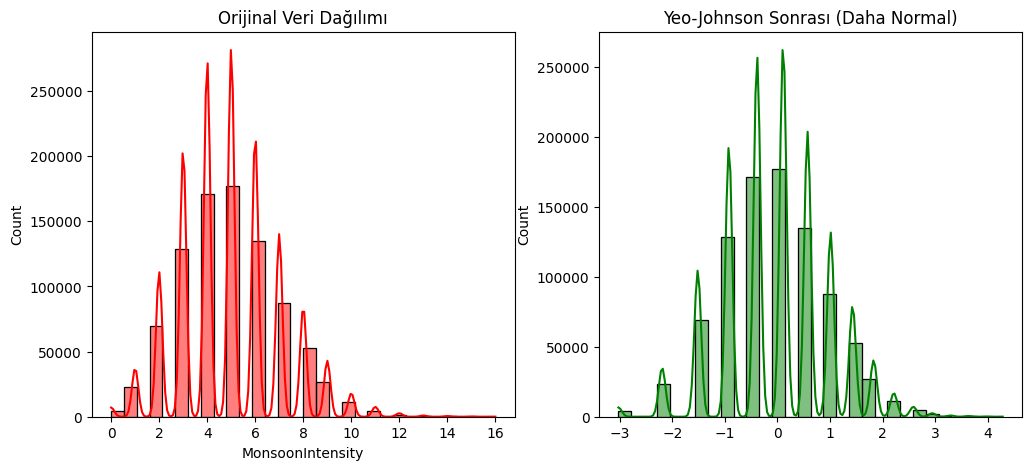

In [39]:
col_idx = 0 
original_data = X_train.iloc[:, col_idx]
transformed_data = X_train_yj[:, col_idx]

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
sns.histplot(original_data, kde=True, color='red', bins=30)
plt.title("Orijinal Veri Dağılımı")


plt.subplot(1, 2, 2)
sns.histplot(transformed_data, kde=True, color='green', bins=30)
plt.title("Yeo-Johnson Sonrası (Daha Normal)")

plt.show()

# Submission

In [40]:
test_ids = pd.read_csv("/kaggle/input/playground-series-s4e5/test.csv")['id']

X_final = df.drop(['FloodProbability'], axis=1) 
y_final = df['FloodProbability']                


X_test_final = df_test 


scaler = StandardScaler()
X_final_scaled = scaler.fit_transform(X_final)
X_test_scaled = scaler.transform(X_test_final)

print("Veriler son eğitim için hazırlandı!")


print("Ridge Modeli tüm veriyle eğitiliyor...")
final_ridge = Ridge(alpha=1.0)
final_ridge.fit(X_final_scaled, y_final)
preds_ridge = final_ridge.predict(X_test_scaled)


print("XGBoost Modeli tüm veriyle eğitiliyor...")
final_xgb = XGBRegressor(
    n_estimators=1000, 
    learning_rate=0.05, 
    max_depth=6, 
    random_state=42, 
    n_jobs=-1
)
final_xgb.fit(X_final_scaled, y_final)
preds_xgb = final_xgb.predict(X_test_scaled)


final_predictions = (0.5 * preds_ridge) + (0.5 * preds_xgb)


submission = pd.DataFrame({
    'id': test_ids,
    'FloodProbability': final_predictions
})


submission.to_csv('submission.csv', index=False)

print("-" * 30)
print(" BAŞARILI! 'submission.csv' dosyası oluşturuldu.")
print("Dosyanın ilk 5 satırı:")
print(submission.head())
print("-" * 30)

Veriler son eğitim için hazırlandı!
Ridge Modeli tüm veriyle eğitiliyor...
XGBoost Modeli tüm veriyle eğitiliyor...
------------------------------
 BAŞARILI! 'submission.csv' dosyası oluşturuldu.
Dosyanın ilk 5 satırı:
        id  FloodProbability
0  1117957          0.576875
1  1117958          0.455119
2  1117959          0.451784
3  1117960          0.467103
4  1117961          0.467067
------------------------------
